## Annotating Images

A few things to note:
- When annotating images, read them in as color images, even if they are gray. This allows you to annotate the image with color.
- OpenCV offers built-in functions for drawing (`rectangle()`, `circle()`, `line()`, polygons, `polylines()` and `putText()`).
- OpenCV uses `(x, y)` co-ordinate system unlike NumPy's `(y, x)`.

We are going to load up a grayscale image as color and examine it.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#Reading a gray image as color
apple = cv2.imread("images/applegray.jpeg", cv2.IMREAD_COLOR)

#Reading the same gray image unchanged
un_apple = cv2.imread("images/applegray.jpeg", cv2.IMREAD_UNCHANGED)

print(apple.shape)
print(un_apple.shape)

(1204, 1880, 3)
(1204, 1880)


[Text(0.5, 1.0, 'Original')]

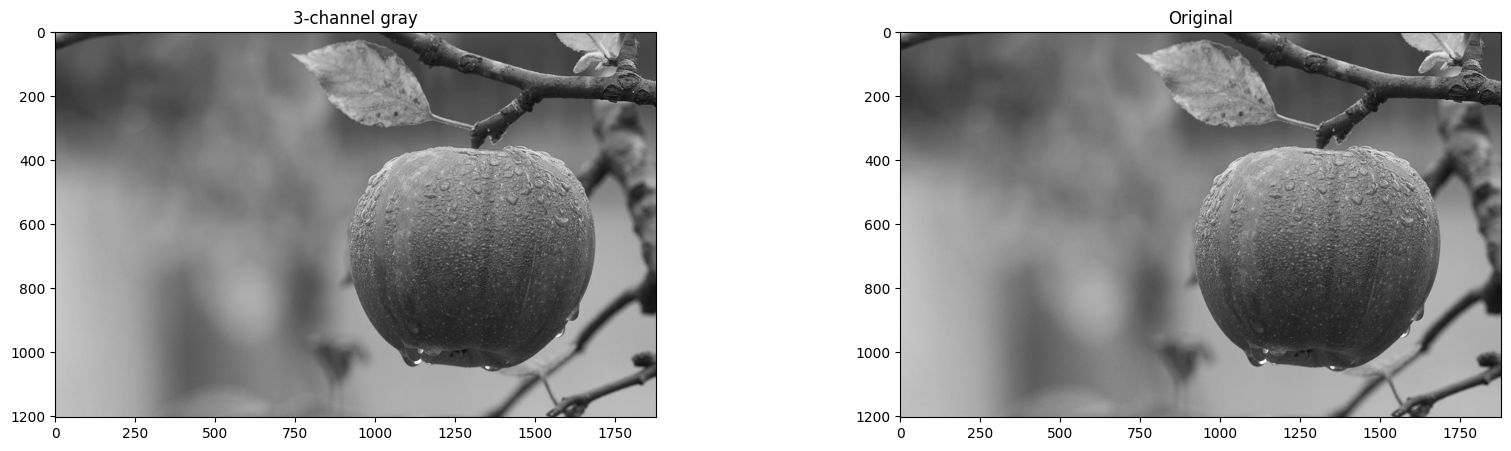

In [3]:
fig, axs = plt.subplots(1, 2, figsize=[20, 5])
axs[0].imshow(apple, cmap='gray')
axs[1].imshow(un_apple, cmap="gray")
axs[0].set(title = "3-channel gray")
axs[1].set(title = "Original")

The images look similar. This is because at any point in the original, say `[30, 56]` there is a value `123`, the 3-channel gray will have the same value across its 3 channels. Hence, any single channel in the 3-channel gray is exactly similar to the Original. Let us examine this.

# Examining the images

In [4]:
#Examine the values
for y in range(30, 1200, 43):
    for x in range(30, 1750, 37):
        print(f'({y},{x})', un_apple[y, x], end = ' == ')
        print(f'({y},{x})', apple[y, x])

(30,30) 43 == (30,30) [43 43 43]
(30,67) 50 == (30,67) [50 50 50]
(30,104) 90 == (30,104) [90 90 90]
(30,141) 92 == (30,141) [92 92 92]
(30,178) 88 == (30,178) [88 88 88]
(30,215) 87 == (30,215) [87 87 87]
(30,252) 90 == (30,252) [90 90 90]
(30,289) 95 == (30,289) [95 95 95]
(30,326) 109 == (30,326) [109 109 109]
(30,363) 118 == (30,363) [118 118 118]
(30,400) 111 == (30,400) [111 111 111]
(30,437) 106 == (30,437) [106 106 106]
(30,474) 105 == (30,474) [105 105 105]
(30,511) 108 == (30,511) [108 108 108]
(30,548) 114 == (30,548) [114 114 114]
(30,585) 115 == (30,585) [115 115 115]
(30,622) 123 == (30,622) [123 123 123]
(30,659) 120 == (30,659) [120 120 120]
(30,696) 112 == (30,696) [112 112 112]
(30,733) 113 == (30,733) [113 113 113]
(30,770) 115 == (30,770) [115 115 115]
(30,807) 121 == (30,807) [121 121 121]
(30,844) 105 == (30,844) [105 105 105]
(30,881) 84 == (30,881) [84 84 84]
(30,918) 112 == (30,918) [112 112 112]
(30,955) 122 == (30,955) [122 122 122]
(30,992) 73 == (30,992) [7

From the above, we see that where `un_apple` is a certain number, `n`, `apple` is `[n, n, n]`. It follows, then, that any channel `c` of `apple` is equal to `un_apple`.

In [5]:
#Showing that any channel c of `apple` is equal to un_apple
for x in range(3):
    print( (apple[:, :, x] == un_apple).all())

True
True
True


We see that indeed this is true. In essence the ranges of both `apple` and `un_apple` are the same, a maximum of 256 colors. Let us map `apple`'s range to see its colors

In [6]:
#Building the range
rang = np.arange(256)
#We will create an image with the values [0 - 255] repeated in a 3-channel image to see what colors they are in RGB
colors = np.empty((256, 1024, 3), dtype = np.uint8)

for x in range(0, colors.shape[1], 4):
    colors[:, x:x + 4] = x/4

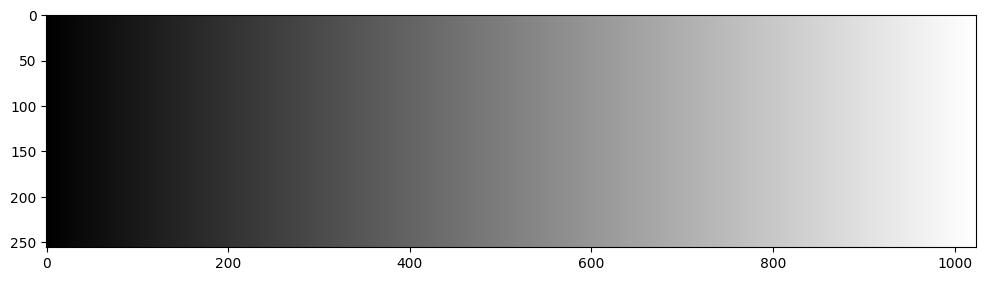

In [7]:
plt.figure(figsize=[12, 12])
plt.imshow(colors)

This is the output color image. Every `[n, n, n]` for 0 <= n < 256 produces a gray image as we would get if we plotted a single channel.

### Curiously

### How would `apple` look like in HSV?

In [8]:
apple_hsv = cv2.cvtColor(apple, cv2.COLOR_RGB2HSV)

In [9]:
apple_hsv.shape

(1204, 1880, 3)

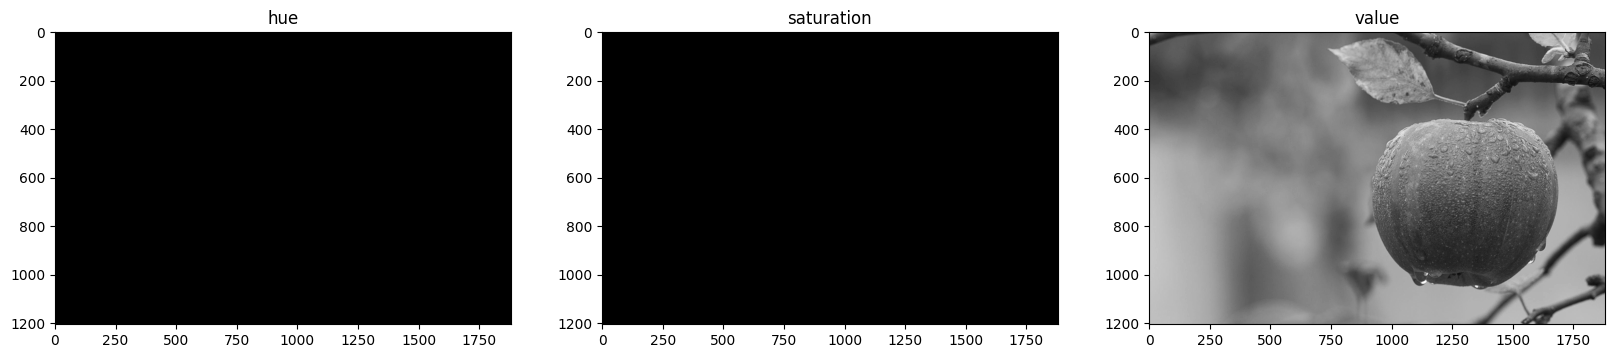

In [10]:
fig2, ax2 = plt.subplots(1, 3, figsize=[20, 10])
h, s, v = cv2.split(apple_hsv)

#hue
ax2[0].imshow(h, cmap="gray")
ax2[0].set(title="hue")

#saturation
ax2[1].imshow(s, cmap="gray")
ax2[1].set(title="saturation")

#value
ax2[2].imshow(v, cmap="gray")
_= ax2[2].set(title='value')


It seems that hue(type of color) and saturation(strength/intensity of that color) are at 0.

In [11]:
print('hue:', np.unique(h))
print('saturation:', np.unique(s))
print('value:', np.unique(v))

hue: [0]
saturation: [0]
value: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 23

Yes, only value exists, for our image.

# Back to Annotating

The other forms of annotation are pretty basic. We are going to draw a polygon around the apple.

In [62]:
#defining the points
#numpy uses (x, y)

pts = np.array([
                [395, 1045],
                [600, 915],
                [800, 930],
                [1025, 1125],
                [1040, 1260],
                [1000, 1520],
                [800, 1665],
                [600, 1690],
                [415, 1600],
                [375, 1345]
               ], np.int32)


#params
isClosed = True #Whether to close the polygon
color = (0, 0, 255) #Specify color in BGR -> Red
thickness = 15 #thickness of the line
linetype = cv2.LINE_AA #type of line AA(Anti-aliasing) gives smooth lines, can also use LINE_8 (jagged lines)

In [63]:
#OpenCv takes (x, y) coordinates
#We switch y, x -> x, y;
for x in range(pts.shape[0]):
    pts[x] = pts[x][::-1]

In [64]:
pts

array([[1045,  395],
       [ 915,  600],
       [ 930,  800],
       [1125, 1025],
       [1260, 1040],
       [1520, 1000],
       [1665,  800],
       [1690,  600],
       [1600,  415],
       [1345,  375]])

In [65]:
pts = pts.reshape((-1, 1, 2)) #Must be a n by 2 array

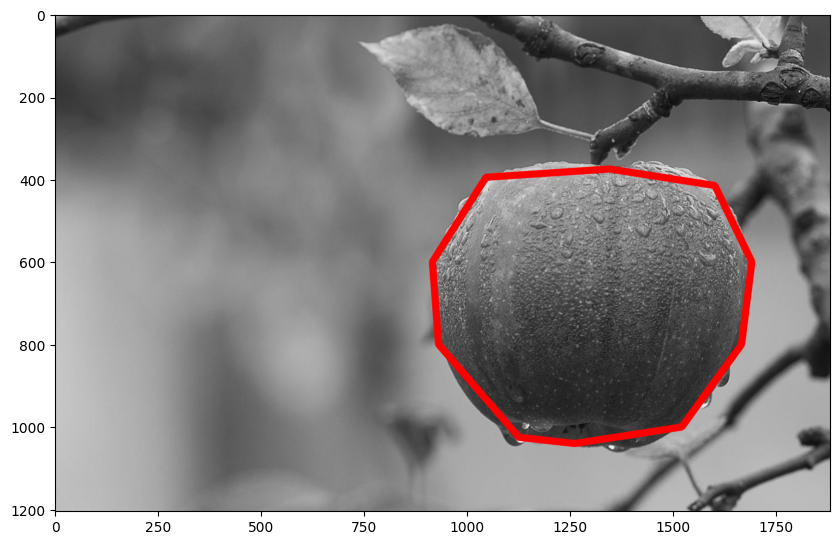

In [66]:
drawn_apple = cv2.polylines(apple.copy(), [pts], True, color, thickness=thickness, lineType=linetype)

#plot
plt.figure(figsize=[10, 10])
plt.imshow(drawn_apple[:, :, ::-1])

In order to close the polygon, ensure to pass the points as a list, i.e `[pts]` and not just as an ndarray `pts`.

In [ ]:
#Save the apple
cv2.imwrite('drawn_gray_apple.png', drawn_apple)